<a href="https://colab.research.google.com/github/micheleguidaa/sentiment-analysis-amazon-reviews/blob/main/Sentimental_Analysis_Amazon_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Percorsi dei file
train_path = "/content/drive/MyDrive/amazon_reviews_multi/amazon_reviews_multi_train.csv"
valid_path = "/content/drive/MyDrive/amazon_reviews_multi/amazon_reviews_multi_valid.csv"
test_path  = "/content/drive/MyDrive/amazon_reviews_multi/amazon_reviews_multi_test.csv"

In [ ]:
# Carico i file
train = pd.read_csv(train_path)
valid = pd.read_csv(valid_path)
test  = pd.read_csv(test_path)

In [ ]:
#Seleziono solo le recensioni in inglese
train_en = train[train.language == "en"]
valid_en = valid[valid.language == "en"]
test_en = test[test.language == "en"]

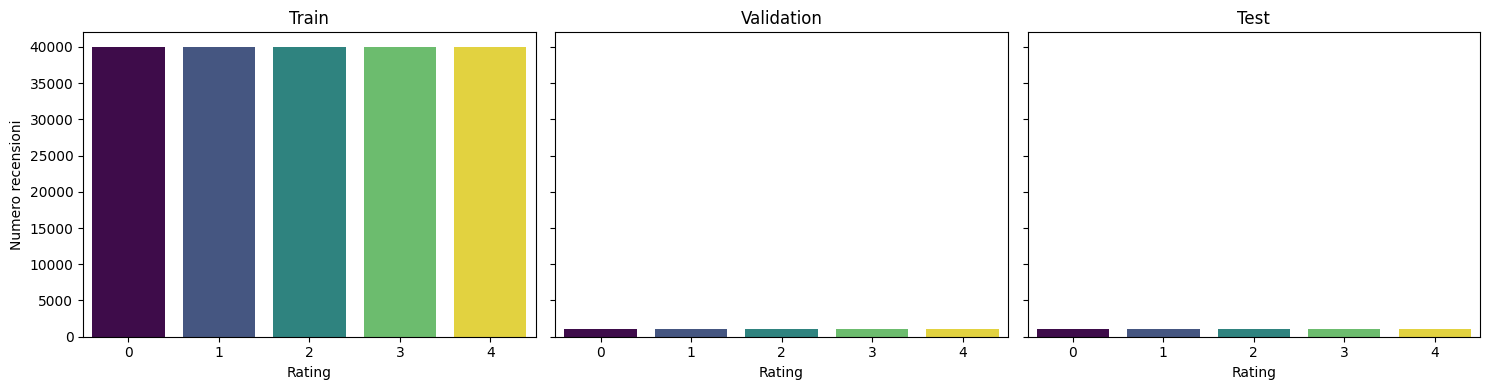

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15,4), sharey=True)

sns.countplot(data=train_en, x="label", hue="label", palette="viridis", legend=False, ax=axes[0])
axes[0].set_title("Train")
axes[0].set_xlabel("Rating")
axes[0].set_ylabel("Numero recensioni")

sns.countplot(data=valid_en, x="label", hue="label", palette="viridis", legend=False, ax=axes[1])
axes[1].set_title("Validation")
axes[1].set_xlabel("Rating")
axes[1].set_ylabel("")

sns.countplot(data=test_en, x="label", hue="label", palette="viridis", legend=False, ax=axes[2])
axes[2].set_title("Test")
axes[2].set_xlabel("Rating")
axes[2].set_ylabel("")

plt.tight_layout()
plt.show()

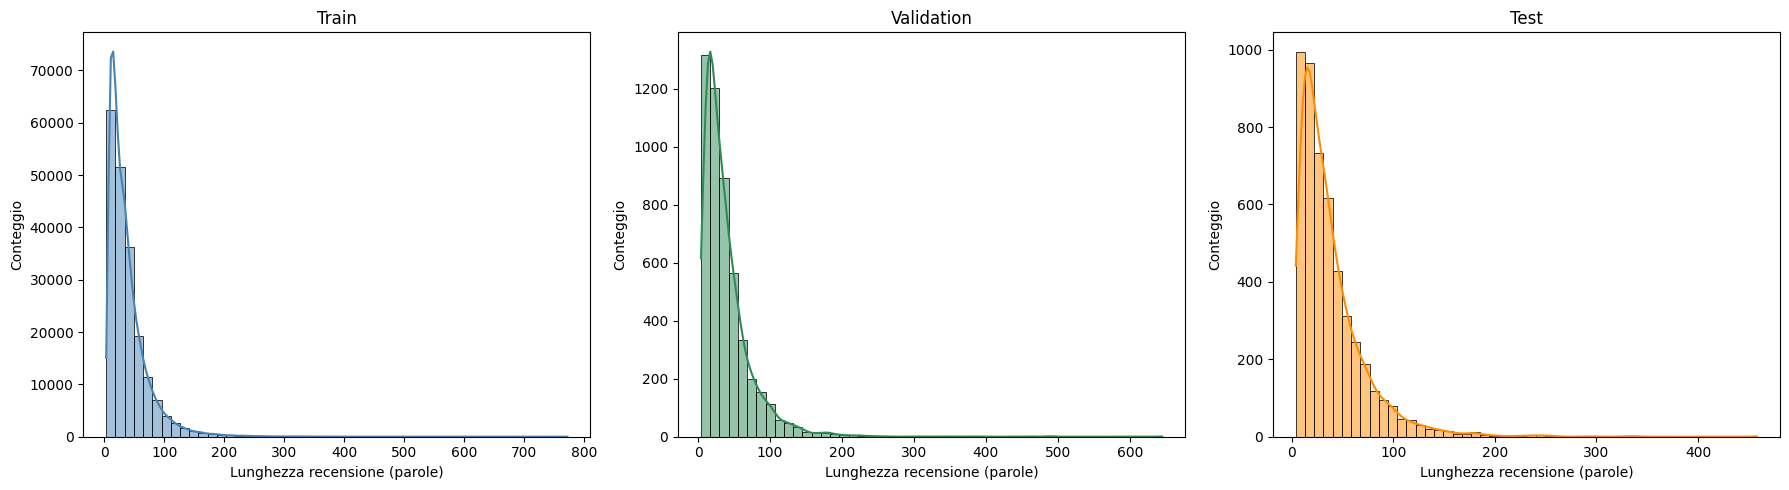

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crea/aggiorna la colonna text_len senza SettingWithCopyWarning
train_en = train_en.assign(text_len=train_en["text"].str.split().str.len())
valid_en = valid_en.assign(text_len=valid_en["text"].str.split().str.len())
test_en  = test_en.assign(text_len=test_en["text"].str.split().str.len())

# Tre istogrammi affiancati, scale indipendenti
fig, axes = plt.subplots(1, 3, figsize=(18,5), sharey=False)

sns.histplot(train_en["text_len"], bins=50, kde=True, color="steelblue", ax=axes[0])
axes[0].set_title("Train")
axes[0].set_xlabel("Lunghezza recensione (parole)")
axes[0].set_ylabel("Conteggio")

sns.histplot(valid_en["text_len"], bins=50, kde=True, color="seagreen", ax=axes[1])
axes[1].set_title("Validation")
axes[1].set_xlabel("Lunghezza recensione (parole)")
axes[1].set_ylabel("Conteggio")

sns.histplot(test_en["text_len"], bins=50, kde=True, color="darkorange", ax=axes[2])
axes[2].set_title("Test")
axes[2].set_xlabel("Lunghezza recensione (parole)")
axes[2].set_ylabel("Conteggio")

plt.tight_layout()
plt.show()


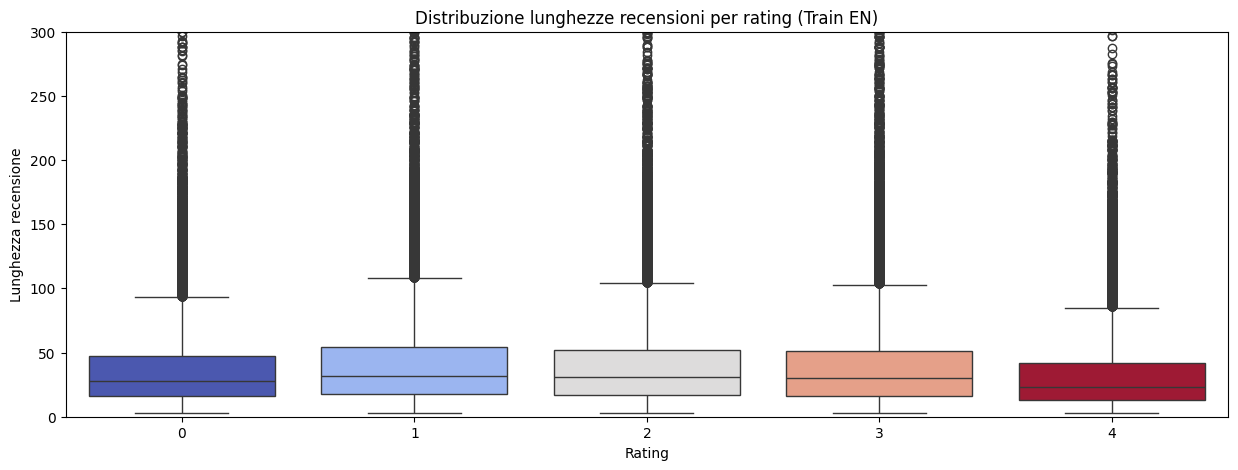

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
sns.boxplot(
    data=train_en,
    x="label",
    y="text_len",
    hue="label",       # serve per usare la palette
    palette="coolwarm",
    legend=False       # evita di mostrare la legenda duplicata
)
plt.title("Distribuzione lunghezze recensioni per rating (Train EN)")
plt.xlabel("Rating")
plt.ylabel("Lunghezza recensione")
plt.ylim(0, 300)  # taglio outlier per renderlo più leggibile
plt.show()


In [ ]:
# Top parole più frequenti per rating

In [ ]:
# WordCloud

In [ ]:
def map_sentiment(label):
    if label in [0, 1]:  # 1–2 stars
        return "neg"
    elif label == 2:     # 3 stars
        return "neu"
    else:                # 4–5 stars
        return "pos"

train_en["sentiment"] = train_en["label"].apply(map_sentiment)
valid_en["sentiment"] = valid_en["label"].apply(map_sentiment)
test_en["sentiment"]  = test_en["label"].apply(map_sentiment)


=== VADER — TEST SET ===
Accuracy: 0.5892
F1-macro: 0.48224089791094293
              precision    recall  f1-score   support

         neg      0.729     0.530     0.614      2000
         neu      0.199     0.093     0.127      1000
         pos      0.582     0.896     0.706      2000

    accuracy                          0.589      5000
   macro avg      0.503     0.506     0.482      5000
weighted avg      0.564     0.589     0.553      5000



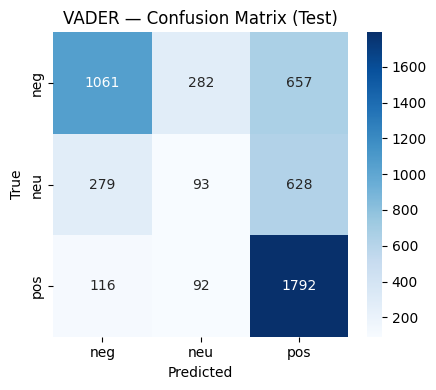

In [ ]:
# --- Import ---
import nltk
nltk.download("vader_lexicon", quiet=True)
from nltk.sentiment import SentimentIntensityAnalyzer

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# --- Inizializza VADER ---
sia = SentimentIntensityAnalyzer()

# --- Funzione: compound -> neg/neu/pos ---
def vader_sentiment(text, pos_thresh=0.05, neg_thresh=-0.05):
    score = sia.polarity_scores(text)["compound"]
    if score >= pos_thresh:
        return "pos"
    elif score <= neg_thresh:
        return "neg"
    else:
        return "neu"

# --- Prediction su test ---
test_preds_vader = test_en["text"].apply(vader_sentiment)

print("\n=== VADER — TEST SET ===")
print("Accuracy:", accuracy_score(test_en["sentiment"], test_preds_vader))
print("F1-macro:", f1_score(test_en["sentiment"], test_preds_vader, average="macro"))
print(classification_report(test_en["sentiment"], test_preds_vader, digits=3))

# --- Confusion Matrix ---
CLASSES = ["neg","neu","pos"]
cm = confusion_matrix(test_en["sentiment"], test_preds_vader, labels=CLASSES)
plt.figure(figsize=(4.5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=CLASSES, yticklabels=CLASSES)
plt.title("VADER — Confusion Matrix (Test)")
plt.xlabel("Predicted"); plt.ylabel("True")
plt.tight_layout(); plt.show()

Gemini batch full (batch=8): 100%|██████████| 625/625 [11:41<00:00,  1.12s/it]



=== GEMINI — polarity (full test), size=5000, batch=8 ===
Accuracy: 0.7376
F1-macro: 0.6419447946521265
              precision    recall  f1-score   support

         neg      0.674     0.960     0.792      2000
         neu      0.413     0.210     0.279      1000
         pos      0.948     0.779     0.856      2000

    accuracy                          0.738      5000
   macro avg      0.678     0.650     0.642      5000
weighted avg      0.732     0.738     0.715      5000


[OK] Salvati i risultati completi in: /content/gemini_results.parquet
[OK] Checkpoint in: /content/gemini_preds_checkpoint.parquet


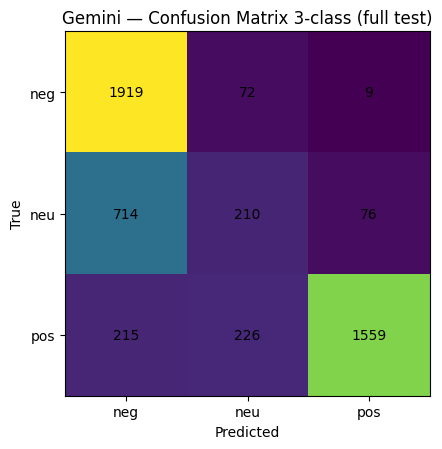

In [ ]:
# === Gemini evaluation: polarity neg/neu/pos (batch, seed param) ==================
import os, time, re, random
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from IPython.display import display

# --------------------------------------------------------------------------
# 0) Segreti Colab / Config Gemini
# --------------------------------------------------------------------------
try:
    from google.colab import userdata
    GEMINI_API_KEY = userdata.get('GEMINI_API_KEY')
except Exception:
    GEMINI_API_KEY = None
if not GEMINI_API_KEY:
    import getpass
    GEMINI_API_KEY = getpass.getpass("Inserisci GEMINI_API_KEY: ")

import google.generativeai as genai
genai.configure(api_key=GEMINI_API_KEY)

MODEL_NAME = "gemini-2.0-flash-lite"  # oppure "gemini-2.5-flash" per più velocità/costi

# --------------------------------------------------------------------------
# 1) Prompt: risposta SOLO in {neg, neu, pos}
# --------------------------------------------------------------------------
INSTRUCTIONS = """Sei un classificatore di sentiment.
Per OGNI recensione, rispondi ESATTAMENTE con UNA sola parola tra:
neg, neu, pos

Regole:
- Niente spiegazioni, niente punteggiatura, niente virgolette.
- Se incerto, rispondi "neu".
- Output: una label per riga, nello stesso ordine delle recensioni.
"""

def build_header() -> str:
    return INSTRUCTIONS

# --------------------------------------------------------------------------
# 2) Chiamata a Gemini in batch (ritorna ['neg'|'neu'|'pos', ...])
# --------------------------------------------------------------------------
LABEL_RE = re.compile(r"\b(neg|neu|pos)\b", re.IGNORECASE)

def _coerce_label(s: str) -> str:
    s = (s or "").strip().lower()
    # pulizia minimale
    s = re.sub(r"[^a-z]", "", s)
    if s in ("neg", "neu", "pos"): return s
    # sinonimi accidentali
    if s.startswith("neg"): return "neg"
    if s.startswith("neu"): return "neu"
    if s.startswith("pos"): return "pos"
    if "negative" in s: return "neg"
    if "neutral"  in s: return "neu"
    if "positive" in s: return "pos"
    return "neu"

def gemini_batch_polarity(reviews: list[str], max_retries=4, sleep_base=0.6) -> list[str]:
    """
    Classifica più recensioni in un'unica chiamata (neg/neu/pos).
    Ritorna una lista di stringhe in {'neg','neu','pos'} nello stesso ordine di input.
    """
    header = build_header()
    lines = [header, "Ora classifica queste recensioni (una label per riga nello stesso ordine):"]
    for i, rev in enumerate(reviews, 1):
        rev_oneline = " ".join(str(rev).split())
        # Format comodo da parsare: riga con indice + testo, poi "Label:"
        lines.append(f"{i}) Review: \"{rev_oneline}\"\nLabel:")

    prompt = "\n".join(lines)

    gen_cfg = genai.GenerationConfig(
        temperature=0,
        max_output_tokens=max(64, 3 * len(reviews) + 16),  # ~3 token/riga + margine
    )
    model = genai.GenerativeModel(MODEL_NAME, generation_config=gen_cfg)

    for attempt in range(max_retries):
        try:
            resp = model.generate_content(prompt)
            raw = (getattr(resp, "text", "") or "").strip()
            # split riga per riga, prendendo la prima occorrenza valida
            out_lines = [l.strip() for l in raw.splitlines() if l.strip()]
            preds = []
            for l in out_lines:
                m = LABEL_RE.search(l)
                if m:
                    preds.append(_coerce_label(m.group(1)))
            if len(preds) < len(reviews):
                preds += ["neu"] * (len(reviews) - len(preds))  # fallback neutro
            return preds[:len(reviews)]
        except Exception:
            # backoff esponenziale + jitter
            time.sleep(sleep_base * (2 ** attempt) + random.random() * 0.1)

    return ["neu"] * len(reviews)  # fallback finale

def gemini_label_polarity(review: str) -> str:
    return gemini_batch_polarity([review])[0]

# --------------------------------------------------------------------------
# 3) Valutazione su TUTTO il test set (robusta, con checkpoint)
# --------------------------------------------------------------------------
from pathlib import Path

CHECKPOINT_PATH = Path("/content/gemini_preds_checkpoint.parquet")  # cambia se vuoi
RESULTS_PATH    = Path("/content/gemini_results.parquet")

# Usa l'intero dataset
texts_all = test_en["text"].astype(str).tolist()
y_true_0_4_all = test_en["label"].astype(int).tolist()

def gold_to_polarity(x: int) -> str:
    if x in (0, 1): return "neg"
    if x == 2:      return "neu"
    return "pos"

y_true_all = [gold_to_polarity(x) for x in y_true_0_4_all]

# Parametri
BATCH_SIZE = 8          # 5–10 è stabile; se vedi rate limit, abbassa
SAVE_EVERY = 200        # salva ogni N batch
SEED = 123

# Riprendi da checkpoint se esiste
start_idx = 0
preds_all = [None] * len(texts_all)
if CHECKPOINT_PATH.exists():
    try:
        ck = pd.read_parquet(CHECKPOINT_PATH)
        # il checkpoint contiene colonne: idx, pred
        for _, row in ck.iterrows():
            preds_all[int(row["idx"])] = row["pred"]
        start_idx = int(ck["idx"].max()) + 1
        print(f"[CKPT] Riprendo da indice {start_idx} (trovate {ck.shape[0]} predizioni).")
    except Exception as e:
        print(f"[CKPT] Errore nel leggere il checkpoint, riparto da zero. Dettagli: {e}")

# Funzione per salvare checkpoint incrementale
def save_ckpt(preds_list, upto_idx):
    rows = [{"idx": i, "pred": p} for i, p in enumerate(preds_list[:upto_idx]) if p is not None]
    if rows:
        pd.DataFrame(rows).to_parquet(CHECKPOINT_PATH, index=False)

# Loop su TUTTE le recensioni
num_batches = (len(texts_all) - start_idx + BATCH_SIZE - 1) // BATCH_SIZE
pbar = tqdm(range(start_idx, len(texts_all), BATCH_SIZE), total=num_batches,
            desc=f"Gemini batch full (batch={BATCH_SIZE})")

bcount = 0
for i in pbar:
    batch = texts_all[i:i+BATCH_SIZE]
    try:
        out = gemini_batch_polarity(batch)
    except Exception as e:
        # retry semplice in caso di errori transienti
        time.sleep(1.0)
        try:
            out = gemini_batch_polarity(batch)
        except Exception as e2:
            print(f"[WARN] Batch {i}-{i+len(batch)} fallito due volte: {e2}. Filler 'neu'.")
            out = ["neu"] * len(batch)

    preds_all[i:i+len(batch)] = out
    bcount += 1

    # salva ogni SAVE_EVERY batch
    if bcount % SAVE_EVERY == 0:
        save_ckpt(preds_all, i + len(batch))

# Salvataggio finale
save_ckpt(preds_all, len(texts_all))

# Verifica che non ci siano buchi; riempi eventuali None con 'neu'
num_none = sum(p is None for p in preds_all)
if num_none:
    print(f"[WARN] {num_none} predizioni mancanti. Riempi con 'neu'.")
    preds_all = [p if p is not None else "neu" for p in preds_all]

# --------------------------------------------------------------------------
# 4) Metriche + salvataggi risultati
# --------------------------------------------------------------------------
CLASSES_3 = ["neg", "neu", "pos"]

print(f"\n=== GEMINI — polarity (full test), size={len(texts_all)}, batch={BATCH_SIZE} ===")
print("Accuracy:", accuracy_score(y_true_all, preds_all))
print("F1-macro:", f1_score(y_true_all, preds_all, average="macro"))
print(classification_report(y_true_all, preds_all, labels=CLASSES_3, digits=3))

# salva risultati completi (utile per analisi errori)
df_out = pd.DataFrame({
    "gold_polarity": y_true_all,
    "pred_polarity": preds_all,
    "text": texts_all
})
df_out.to_parquet(RESULTS_PATH, index=False)
print(f"\n[OK] Salvati i risultati completi in: {RESULTS_PATH}")
print(f"[OK] Checkpoint in: {CHECKPOINT_PATH}")

# Confusion Matrix
cm = confusion_matrix(y_true_all, preds_all, labels=CLASSES_3)
plt.figure(figsize=(5.2,4.6))
plt.imshow(cm, interpolation='nearest')
plt.title(f"Gemini — Confusion Matrix 3-class (full test)")
plt.xticks(range(len(CLASSES_3)), CLASSES_3)
plt.yticks(range(len(CLASSES_3)), CLASSES_3)
for (r, c), v in np.ndenumerate(cm):
    plt.text(c, r, str(v), ha='center', va='center')
plt.xlabel("Predicted"); plt.ylabel("True")
plt.tight_layout(); plt.show()


In [ ]:
# ======================= Install =======================
!pip -q install -U transformers datasets evaluate accelerate scikit-learn

# ======================= Imports & Seed =======================
import os, numpy as np, pandas as pd, torch, random
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from datasets import Dataset, DatasetDict
import evaluate
from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification,
    DataCollatorWithPadding, Trainer, TrainingArguments,
    EarlyStoppingCallback, set_seed
)
set_seed(123)

# ======================= Data prep (0-4 -> 3 classi) =======================
assert 'train_en' in globals() and 'test_en' in globals(), "Serve train_en/test_en con colonne: text,label."

def map_0_4_to_3(x:int)->int:
    # 0-1 -> 0(neg), 2 -> 1(neu), 3-4 -> 2(pos)
    return 0 if x in (0,1) else (1 if x==2 else 2)

train_df = train_en[['text','label']].dropna().copy()
test_df  = test_en[['text','label']].dropna().copy()
train_df['label3'] = train_df['label'].astype(int).apply(map_0_4_to_3)
test_df['label3']  = test_df['label'].astype(int).apply(map_0_4_to_3)

# split stratificato 90/10 per validation
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.10, random_state=123)
tr_idx, va_idx = next(sss.split(train_df, train_df['label3']))
train_split = train_df.iloc[tr_idx].reset_index(drop=True)
val_split   = train_df.iloc[va_idx].reset_index(drop=True)

# HF datasets (evitiamo colonne spurie)
def to_hfds(df):
    return Dataset.from_dict({'text': df['text'].astype(str).tolist(),
                              'labels': df['label3'].astype(int).tolist()})
ds = DatasetDict(
    train=to_hfds(train_split),
    validation=to_hfds(val_split),
    test=to_hfds(test_df)
)

# ======================= Model & Tokenizer =======================
MODEL_NAME = "microsoft/deberta-v3-base"
id2label = {0:"neg", 1:"neu", 2:"pos"}
label2id = {v:k for k,v in id2label.items()}

tok = AutoTokenizer.from_pretrained(MODEL_NAME, use_fast=True)

def preprocess(batch):
    return tok(batch['text'], truncation=True, max_length=256)
ds_tok = ds.map(preprocess, batched=True, remove_columns=['text'])
collator = DataCollatorWithPadding(tokenizer=tok, pad_to_multiple_of=8)

dtype_bf16 = torch.cuda.is_available() and torch.cuda.is_bf16_supported()
model = AutoModelForSequenceClassification.from_pretrained(
    MODEL_NAME,
    num_labels=3,
    id2label=id2label,
    label2id=label2id,
    torch_dtype=torch.bfloat16 if dtype_bf16 else None
)
# Memory/VRAM tricks
model.gradient_checkpointing_enable()
torch.backends.cuda.matmul.allow_tf32 = True

# ======================= Class Weights (sbilanciamento) =======================
cls_counts = train_split['label3'].value_counts().sort_index().to_numpy()  # [neg, neu, pos]
freq = cls_counts / cls_counts.sum()
weights = (1.0 / (freq + 1e-9))
weights = weights / weights.mean()
class_weights = torch.tensor(weights, dtype=torch.float)
print("Class weights (neg, neu, pos):", class_weights.tolist())

# ======================= Trainer con loss pesata =======================
from torch.nn import CrossEntropyLoss
class WeightedTrainer(Trainer):
    def __init__(self, *args, class_weights=None, **kwargs):
        super().__init__(*args, **kwargs)
        self.class_weights = class_weights

    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.get("labels")
        outputs = model(**inputs)
        logits = outputs.get("logits")
        cw = self.class_weights.to(logits.device) if self.class_weights is not None else None
        loss_fct = CrossEntropyLoss(weight=cw)
        loss = loss_fct(logits.view(-1, model.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss

# ======================= Metrics =======================
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=-1)
    return {
        "accuracy": accuracy_score(labels, preds),
        "f1_macro": f1_score(labels, preds, average="macro"),
    }

# ======================= Training args (Colab-safe) =======================
per_dev_bs = 8
grad_accum = 4  # eff. batch 32
args = TrainingArguments(
    output_dir="deberta_v3_base_sa",
    num_train_epochs=3,
    learning_rate=2e-5,
    weight_decay=0.01,
    per_device_train_batch_size=per_dev_bs,
    per_device_eval_batch_size=max(16, per_dev_bs),
    gradient_accumulation_steps=grad_accum,
    evaluation_strategy="steps",
    eval_steps=500,
    logging_steps=100,
    save_steps=500,
    save_total_limit=2,
    load_best_model_at_end=True,
    metric_for_best_model="f1_macro",
    greater_is_better=True,
    fp16=(not dtype_bf16) and torch.cuda.is_available(),
    bf16=dtype_bf16,
    report_to="none"
)

trainer = WeightedTrainer(
    model=model,
    args=args,
    train_dataset=ds_tok["train"],
    eval_dataset=ds_tok["validation"],
    tokenizer=tok,
    data_collator=collator,
    compute_metrics=compute_metrics,
    class_weights=class_weights,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]
)

# ======================= Train =======================
train_result = trainer.train()
print("Best checkpoint:", trainer.state.best_model_checkpoint)

# ======================= Val/Test Eval =======================
print("\nValidation metrics:", trainer.evaluate(ds_tok["validation"]))

test_preds = trainer.predict(ds_tok["test"])
test_y = test_preds.label_ids
test_hat = np.argmax(test_preds.predictions, axis=-1)
print("\n=== TEST ===")
print("Accuracy:", accuracy_score(test_y, test_hat))
print("F1-macro:", f1_score(test_y, test_hat, average="macro"))
print(classification_report(test_y, test_hat, target_names=[id2label[i] for i in range(3)], digits=3))

# Confusion Matrix
import matplotlib.pyplot as plt
import numpy as np
cm = confusion_matrix(test_y, test_hat, labels=[0,1,2])
plt.figure(figsize=(4.8,4.2))
plt.imshow(cm, interpolation='nearest')
plt.title("DeBERTa-v3-base — Confusion Matrix (test)")
plt.xticks(range(3), [id2label[i] for i in range(3)])
plt.yticks(range(3), [id2label[i] for i in range(3)])
for (i, j), v in np.ndenumerate(cm):
    plt.text(j, i, str(v), ha='center', va='center')
plt.xlabel("Predicted"); plt.ylabel("True")
plt.tight_layout(); plt.show()

# ======================= Save & Inference =======================
save_dir = "deberta_v3_base_sa/best"
trainer.save_model(save_dir)
tok.save_pretrained(save_dir)
print(f"Modello salvato in: {save_dir}")

# Esempio inference
from transformers import pipeline
clf = pipeline("text-classification", model=save_dir, tokenizer=sav_
